In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load dataset

df = pd.read_csv("train.csv")

print(df.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          20       RL        141.0    31770   Pave   NaN      IR1   
1   2          20       RH         80.0    11622   Pave   NaN      Reg   
2   3          20       RL         81.0    14267   Pave   NaN      IR1   
3   4          20       RL         93.0    11160   Pave   NaN      Reg   
4   5          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      5   2010        WD         Normal     21500

In [3]:
y = df["SalePrice"]  # target
x = df.drop("SalePrice",axis=1) # features

print(x)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          20       RL        141.0    31770   Pave   NaN      IR1   
1        2          20       RH         80.0    11622   Pave   NaN      Reg   
2        3          20       RL         81.0    14267   Pave   NaN      IR1   
3        4          20       RL         93.0    11160   Pave   NaN      Reg   
4        5          60       RL         74.0    13830   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2925  2926          80       RL         37.0     7937   Pave   NaN      IR1   
2926  2927          20       RL          NaN     8885   Pave   NaN      IR1   
2927  2928          85       RL         62.0    10441   Pave   NaN      Reg   
2928  2929          20       RL         77.0    10010   Pave   NaN      Reg   
2929  2930          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [4]:
missing_values = x.isnull().sum().sort_values(ascending=False).head(20)
print(missing_values)

PoolQC          2917
MiscFeature     2824
Alley           2732
Fence           2358
MasVnrType      1775
FireplaceQu     1422
LotFrontage      490
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      83
BsmtFinType2      81
BsmtFinType1      80
BsmtQual          80
BsmtCond          80
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
dtype: int64


In [5]:
# fill the missing data
num_columns = x.select_dtypes(include=["int64","float64"]).columns
x[num_columns] = x[num_columns].fillna(x[num_columns].median())

cat_columns = x.select_dtypes(include=["object"]).columns
x[cat_columns] = x[cat_columns].fillna("missing")

In [6]:
# convert the categorical data to numeric data

x = pd.get_dummies(x,drop_first=True)


In [7]:
from sklearn.model_selection import train_test_split 

x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

print("MAE: ", mean_absolute_error(y_test,y_predict))
print("MSE:",mean_squared_error(y_test,y_predict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predict)))
print("R2_score:",r2_score(y_test,y_predict))

MAE:  16388.733301478977
MSE: 1242660561.126829
RMSE: 35251.39091052762
R2_score: 0.8450074047781673


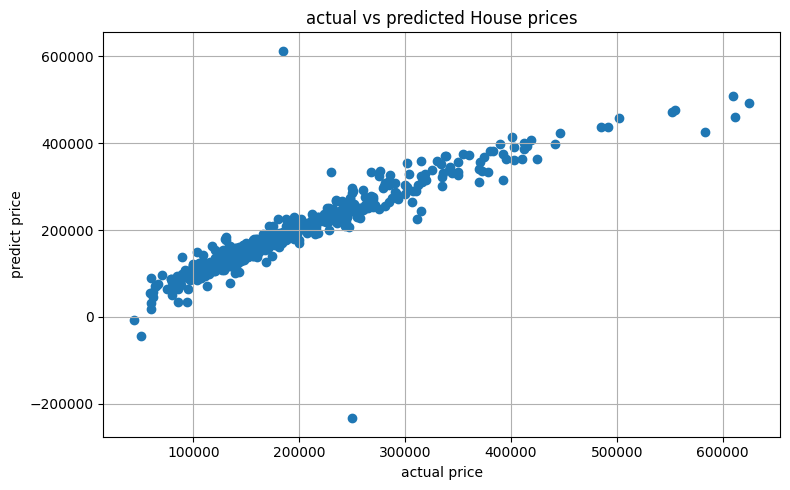

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_predict)
plt.xlabel("actual price")
plt.ylabel("predict price")
plt.title("actual vs predicted House prices")
plt.tight_layout()
plt.grid(True)
plt.show()


### advance prediction model

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_model =RandomForestRegressor(n_estimators=200,random_state=42,n_jobs=1)

rf_model.fit(x_train,y_train)

rf_pred =rf_model.predict(x_test)




In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

print(f"MAE: {mean_absolute_error(y_test,rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,rf_pred))}")
print(f"r2_score: {r2_score(y_test,rf_pred)}")

MAE: 15814.909974402732
RMSE: 27046.247231219342
r2_score: 0.9087626920854069


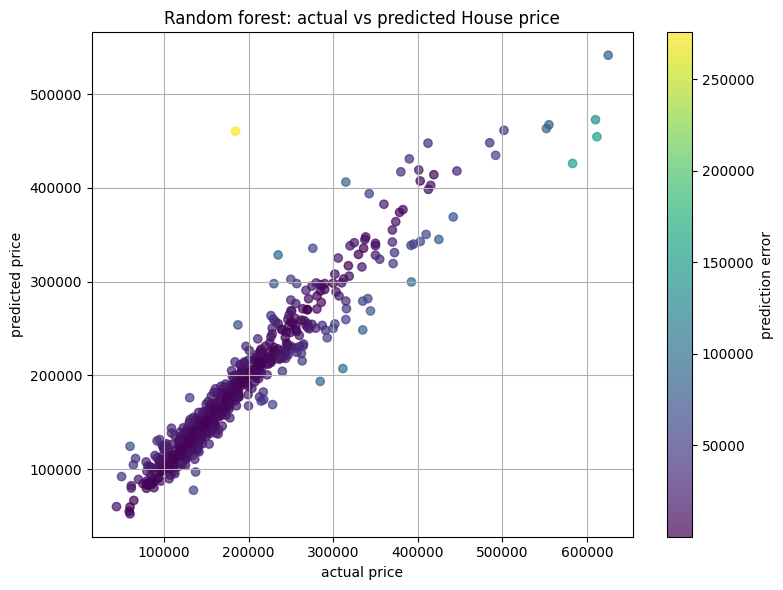

In [13]:
plt.figure(figsize=(8,6))
errors = abs(y_test - rf_pred)
plt.scatter(y_test,rf_pred ,c = errors , alpha=0.7)
plt.colorbar(label="prediction error")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Random forest: actual vs predicted House price")
plt.tight_layout()
plt.grid(True)
plt.show()

### xgboost model

In [14]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300,learning_rate=0.05,max_depth=4
                         ,subsample=0.8,colsample_bytree=0.8,random_state=42)

xgb_model.fit(x_train,y_train)
xgb_pred = xgb_model.predict(x_test)


In [15]:
print(f"XGBoost MAE: ",mean_absolute_error(y_test,xgb_pred))
print(f"XGBoost r2_score: ",r2_score(y_test,xgb_pred))



XGBoost MAE:  14390.74609375
XGBoost r2_score:  0.9271754026412964


In [16]:
import pickle

with open("model.pkl","wb") as file:
    pickle.dump(rf_model,file)

In [17]:
features = [
    "OverallQual",
    "GrLivArea",
    "TotRmsAbvGrd",
    "YearBuilt"
]

X = df[features]
y = df["SalePrice"]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model retrained & saved")

Model retrained & saved
